# Part II - FordGoBike Trip Data - users characteristics 
## by Jakub J.

## Investigation Overview

I would like to summarise the customer behaviour characteristics. I focused on time, age, gender, duration, and user type to analyze and understand how we can describe common user for this bike system

## Dataset Overview

> FordGoBike Trip Data contains 173'364 entries that occured February 2019. 

In [32]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [33]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('tripdata-final.csv')
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,member_age,duration_min,age_category
0,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,Feb,28,47,26.416667,"(40, 50]"
1,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,Feb,28,62,29.883333,"(60, 70]"


In [34]:
df['age_category'].value_counts()

(30, 40]        46960
(20, 30]        35735
(30.0, 40.0]    25102
(20.0, 30.0]    20494
(40, 50]        17738
(40.0, 50.0]     9825
(50, 60]         8110
(50.0, 60.0]     4645
(60, 70]         2530
(60.0, 70.0]     1551
(70, 80]          397
(70.0, 80.0]      247
Name: age_category, dtype: int64

## Percentage share per Users Type

FordGoBike dataset contain two type of user:

- Subscriber
- Customer

In the next visualization I will show the percentage split of users type.

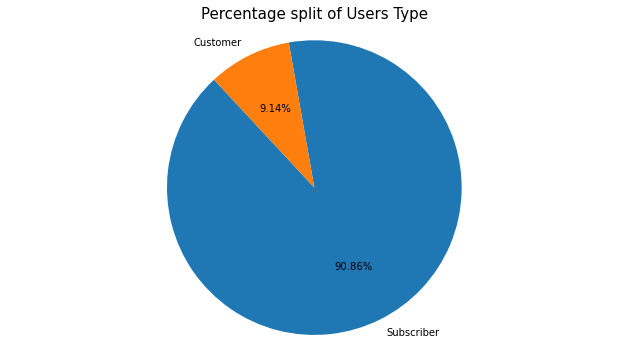

In [12]:
plt.figure(figsize=(11,6))
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 100,
        counterclock = False, autopct='%1.2f%%');
plt.axis('equal')
plt.title('Percentage split of Users Type', fontsize=15);


## Connection between trip duration and gender

FordGoBike dataset contain three type of user gender:

- Male
- Female
- Other

In the next visualization I will show what is distribution of trips for users per gender.

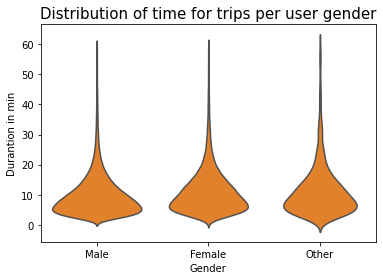

In [23]:
base_color = sb.color_palette()[1]
sb.violinplot(data=df, x='member_gender', y='duration_min', color=base_color, inner=None, height=30);
ax = plt.gca()
plt.xlabel('Gender');
plt.ylabel('Durantion in min');
ax.set_title("Distribution of time for trips per user gender", fontsize=15);

## Trip Duration for Each User Type Based on Gender

Below visualization will show connected view of type of user, its gender and duration of trips. 

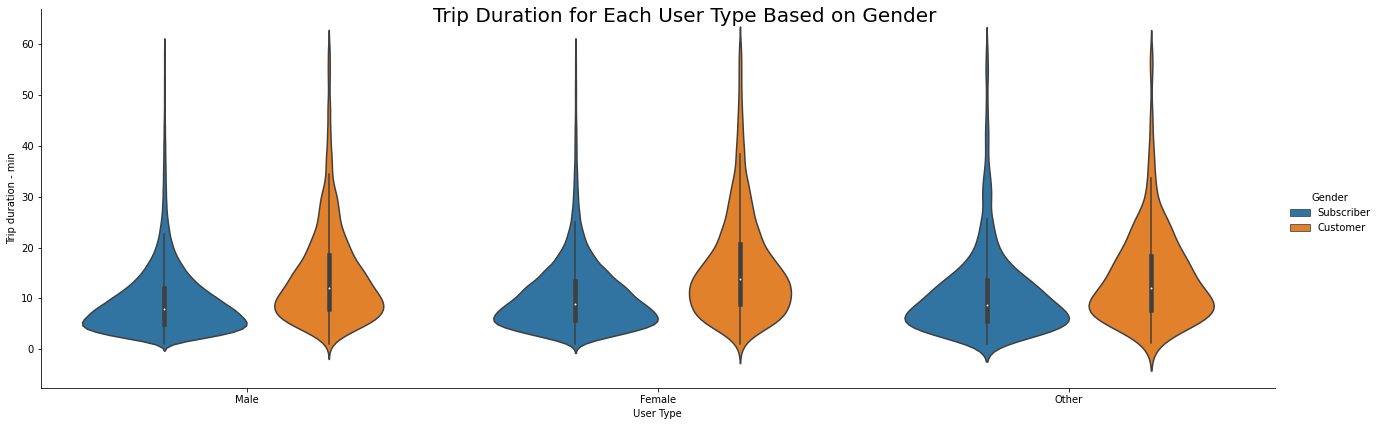

In [24]:
ax = sb.catplot(data=df, x='member_gender', y="duration_min", hue="user_type", kind="violin", height=6, aspect=3)

ax.set_axis_labels("User Type", "Trip duration - min")
ax._legend.set_title('Gender')
ax.fig.suptitle('Trip Duration for Each User Type Based on Gender', fontsize=20);

## Connection between trip duration and age

In [26]:
df_share = df.groupby('age_category').agg({'bike_id':'count'})
df_share['percentage'] = (df_share['bike_id']/df_share['bike_id'].sum())*100
df_share

,bike_id,percentage
age_category,,
"(20, 30]",35735,20.616267
"(20.0, 30.0]",20494,11.823416
"(30, 40]",46960,27.092203
"(30.0, 40.0]",25102,14.481867
"(40, 50]",17738,10.233422
"(40.0, 50.0]",9825,5.668247
"(50, 60]",8110,4.678828
"(50.0, 60.0]",4645,2.679797
"(60, 70]",2530,1.459610


In [31]:
df['age_category'].value_counts()

(30, 40]        46960
(20, 30]        35735
(30.0, 40.0]    25102
(20.0, 30.0]    20494
(40, 50]        17738
(40.0, 50.0]     9825
(50, 60]         8110
(50.0, 60.0]     4645
(60, 70]         2530
(60.0, 70.0]     1551
(70, 80]          397
(70.0, 80.0]      247
Name: age_category, dtype: int64

In [ ]:
ax = plt.gca()
ax.set_ylabel('Age')
ax.set_xlabel('User Type')
ax.set_title("Age Distribution Based on User Type", fontsize=15);

In [27]:

df.bike_id.plot(kind='bar', figsize=(10,6),fontsize =15, color=base_color)

plt.xticks(rotation=0)
ax = plt.gca()
ax.set_ylabel('Sum of Rides')
ax.set_xlabel('Age Group')
ax.set_title("Number of Bike Rides per User Age", fontsize=15);

Error in callback <function flush_figures at 0x000002BCD3251CA0> (for post_execute):


KeyboardInterrupt: 

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
